## Amazon BestSeller Genre Prediction

Given *data about Amazon's Top 50 best selling books from 2009-2019*, let's try to predict the **genre** of a given book.

We will use a TensorFlow ANN with two inputs to make our predictions.

Data source: https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import re
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

2025-06-05 10:32:53.875666: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('bestsellers with categories.csv')
data

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


### Preprocessing

In [5]:
stop_words = stopwords.words('english')
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [6]:
def process_name(name):
    name = re.sub(r'\d', ' ', name)
    name = name.split()
    name = ' '.join([word for word in name if word not in stop_words])
    return name

In [8]:
names = data['Name'].apply(process_name)
names

0                            -Day Green Smoothie Cleanse
1                                          / / : A Novel
2                          Rules Life: An Antidote Chaos
3                                      (Signet Classics)
4      , Awesome Facts (About Everything!) (National ...
                             ...                        
545                Wrecking Ball (Diary Wimpy Kid Book )
546    You Are Badass: How Stop Doubting Your Greatne...
547    You Are Badass: How Stop Doubting Your Greatne...
548    You Are Badass: How Stop Doubting Your Greatne...
549    You Are Badass: How Stop Doubting Your Greatne...
Name: Name, Length: 550, dtype: object

In [11]:
max_seq_length = np.max(names.apply(lambda name: len(name.split())))
max_seq_length

20

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(names)

In [14]:
tokenizer.word_index

{'the': 1,
 'a': 2,
 'book': 3,
 'you': 4,
 'love': 5,
 'edition': 6,
 'life': 7,
 'guide': 8,
 'novel': 9,
 'your': 10,
 'coloring': 11,
 'that': 12,
 'kids': 13,
 'man': 14,
 'how': 15,
 'american': 16,
 'series': 17,
 'fifty': 18,
 'shades': 19,
 'dog': 20,
 'world': 21,
 'girl': 22,
 'people': 23,
 'cookbook': 24,
 'art': 25,
 'manual': 26,
 'harry': 27,
 'potter': 28,
 'secret': 29,
 'killing': 30,
 'personal': 31,
 'books': 32,
 'kid': 33,
 'th': 34,
 'little': 35,
 'good': 36,
 'an': 37,
 'from': 38,
 'what': 39,
 'recipes': 40,
 'diary': 41,
 'wimpy': 42,
 'hunger': 43,
 'games': 44,
 'change': 45,
 'story': 46,
 'languages': 47,
 'official': 48,
 'day': 49,
 'fire': 50,
 'stop': 51,
 'f': 52,
 'trilogy': 53,
 'one': 54,
 'go': 55,
 'to': 56,
 'things': 57,
 'publication': 58,
 'psychological': 59,
 'association': 60,
 'lasts': 61,
 'living': 62,
 'great': 63,
 'first': 64,
 'food': 65,
 'eat': 66,
 'weight': 67,
 'grey': 68,
 'who': 69,
 'are': 70,
 'why': 71,
 'new': 72,
 'ki

In [15]:
vocab_length = len(tokenizer.word_index) + 1
print("Vocabulary Length: ", vocab_length)

Vocabulary Length:  1160


In [16]:
names = tokenizer.texts_to_sequences(names)
names

[[49, 585, 586, 587],
 [2, 9],
 [343, 7, 37, 588, 589],
 [590, 344],
 [153, 345, 119, 262, 200, 201, 13],
 [2, 95, 154, 2, 591, 346, 50],
 [2, 77, 96, 2, 202, 203, 2, 204, 205, 2, 206, 207, 2, 95, 154],
 [2, 592, 593, 2, 9],
 [2, 594, 595, 155, 263, 120],
 [2, 14, 347, 348, 2, 9],
 [2, 14, 347, 348, 2, 9],
 [2, 596, 349, 350, 351, 38, 597, 63, 598, 78, 352],
 [2, 599, 7, 2, 121],
 [2, 600, 79, 79, 601],
 [602, 80, 603, 353, 80, 14, 39, 604, 605, 353, 119, 5, 606, 607, 354],
 [97, 11, 3, 208, 209, 608, 11, 3, 264, 208, 355, 156, 609, 356],
 [97, 11, 3, 209, 357, 358, 208],
 [97, 11, 3, 209, 357, 356],
 [97, 11, 32, 2, 11, 3, 359, 610, 355, 611, 360, 361, 156, 612],
 [613, 362],
 [265, 363, 157, 364, 210],
 [265, 363, 157, 364, 210],
 [614],
 [16, 365, 1, 266, 267, 615, 365, 366, 367, 616, 349],
 [158, 617, 618],
 [619, 620, 15, 51, 621, 622, 98, 368],
 [623, 23, 624],
 [266, 369, 625, 370],
 [626, 627, 371, 156],
 [628, 629, 630, 209, 631],
 [268, 269, 632, 40, 4, 122, 372, 2, 24],
 [26

In [17]:
names = pad_sequences(names, maxlen = max_seq_length)
names

array([[  0,   0,   0, ..., 585, 586, 587],
       [  0,   0,   0, ...,   0,   2,   9],
       [  0,   0,   0, ...,  37, 588, 589],
       ...,
       [  0,   0,   0, ...,  62, 153,   7],
       [  0,   0,   0, ...,  62, 153,   7],
       [  0,   0,   0, ...,  62, 153,   7]], dtype=int32)

In [18]:
data.drop('Name', axis=1, inplace=True)

In [19]:
data

,Author,User Rating,Reviews,Price,Year,Genre
0,JJ Smith,4.7,17350,8,2016,Non Fiction
1,Stephen King,4.6,2052,22,2011,Fiction
2,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,George Orwell,4.7,21424,6,2017,Fiction
4,National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...
545,Jeff Kinney,4.9,9413,8,2019,Fiction
546,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,Jen Sincero,4.7,14331,8,2018,Non Fiction


#### Encoding Other Features

In [20]:
genre_mapping = {'Non Fiction': 0, 'Fiction': 1}

data['Genre'] = data['Genre'].replace(genre_mapping)

/tmp/ipykernel_9524/2413103998.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Genre'] = data['Genre'].replace(genre_mapping)


In [21]:
data

,Author,User Rating,Reviews,Price,Year,Genre
0,JJ Smith,4.7,17350,8,2016,0
1,Stephen King,4.6,2052,22,2011,1
2,Jordan B. Peterson,4.7,18979,15,2018,0
3,George Orwell,4.7,21424,6,2017,1
4,National Geographic Kids,4.8,7665,12,2019,0
...,...,...,...,...,...,...
545,Jeff Kinney,4.9,9413,8,2019,1
546,Jen Sincero,4.7,14331,8,2016,0
547,Jen Sincero,4.7,14331,8,2017,0
548,Jen Sincero,4.7,14331,8,2018,0


In [24]:
print("Number of unique authors: ", len(data['Author'].unique()))

Number of unique authors:  248


In [26]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix, dtype=int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [27]:
data = onehot_encode(data, 'Author', 'Author')
data

,User Rating,Reviews,Price,Year,Genre,Author_Abraham Verghese,Author_Adam Gasiewski,Author_Adam Mansbach,Author_Adir Levy,Author_Admiral William H. McRaven,...,Author_Todd Burpo,Author_Tony Hsieh,Author_Tucker Carlson,Author_Veronica Roth,Author_W. Cleon Skousen,Author_Walter Isaacson,Author_William Davis,Author_William P. Young,Author_Wizards RPG Team,Author_Zhi Gang Sha
0,4.7,17350,8,2016,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.6,2052,22,2011,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,18979,15,2018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.7,21424,6,2017,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.8,7665,12,2019,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,4.9,9413,8,2019,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
546,4.7,14331,8,2016,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
547,4.7,14331,8,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,4.7,14331,8,2018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Split and Scale the data
y = data['Genre'].copy()
X = data.drop('Genre', axis=1)

In [29]:
# Scale X
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X))
X

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,0.359990,0.460453,-0.470810,0.632456,-0.060412,-0.042679,-0.042679,-0.042679,-0.042679,-0.042679,...,-0.060412,-0.042679,-0.042679,-0.085592,-0.042679,-0.074057,-0.060412,-0.060412,-0.074057,-0.060412
1,-0.080978,-0.844786,0.821609,-0.948683,-0.060412,-0.042679,-0.042679,-0.042679,-0.042679,-0.042679,...,-0.060412,-0.042679,-0.042679,-0.085592,-0.042679,-0.074057,-0.060412,-0.060412,-0.074057,-0.060412
2,0.359990,0.599440,0.175400,1.264911,-0.060412,-0.042679,-0.042679,-0.042679,-0.042679,-0.042679,...,-0.060412,-0.042679,-0.042679,-0.085592,-0.042679,-0.074057,-0.060412,-0.060412,-0.074057,-0.060412
3,0.359990,0.808050,-0.655441,0.948683,-0.060412,-0.042679,-0.042679,-0.042679,-0.042679,-0.042679,...,-0.060412,-0.042679,-0.042679,-0.085592,-0.042679,-0.074057,-0.060412,-0.060412,-0.074057,-0.060412
4,0.800958,-0.365880,-0.101547,1.581139,-0.060412,-0.042679,-0.042679,-0.042679,-0.042679,-0.042679,...,-0.060412,-0.042679,-0.042679,-0.085592,-0.042679,-0.074057,-0.060412,-0.060412,-0.074057,-0.060412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,1.241926,-0.216739,-0.470810,1.581139,-0.060412,-0.042679,-0.042679,-0.042679,-0.042679,-0.042679,...,-0.060412,-0.042679,-0.042679,-0.085592,-0.042679,-0.074057,-0.060412,-0.060412,-0.074057,-0.060412
546,0.359990,0.202869,-0.470810,0.632456,-0.060412,-0.042679,-0.042679,-0.042679,-0.042679,-0.042679,...,-0.060412,-0.042679,-0.042679,-0.085592,-0.042679,-0.074057,-0.060412,-0.060412,-0.074057,-0.060412
547,0.359990,0.202869,-0.470810,0.948683,-0.060412,-0.042679,-0.042679,-0.042679,-0.042679,-0.042679,...,-0.060412,-0.042679,-0.042679,-0.085592,-0.042679,-0.074057,-0.060412,-0.060412,-0.074057,-0.060412
548,0.359990,0.202869,-0.470810,1.264911,-0.060412,-0.042679,-0.042679,-0.042679,-0.042679,-0.042679,...,-0.060412,-0.042679,-0.042679,-0.085592,-0.042679,-0.074057,-0.060412,-0.060412,-0.074057,-0.060412


In [30]:
names_train, names_test, X_train, X_test, y_train, y_test = train_test_split(names, X, y, train_size=0.7, random_state=100)

In [31]:
len(names_train)

385

In [32]:
len(X_train)

385

### Modeling/Training

In [34]:
names.shape

(550, 20)

In [35]:
X.shape

(550, 252)

In [36]:
embedding_dim = 64

# Name features
name_input = tf.keras.Input(shape=(20,), name='name_input')
embedding = tf.keras.layers.Embedding(
    input_dim = vocab_length,
    output_dim = embedding_dim,
    input_length = max_seq_length,
    name='name_embedding'
)(name_input)

print(embedding.shape)

(None, 20, 64)


2025-06-05 11:57:48.994931: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [37]:
name_flatten = tf.keras.layers.Flatten(name='name_flatten')(embedding)

print(name_flatten.shape)

(None, 1280)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 name_input (InputLayer)        [(None, 20)]         0           []                               
                                                                                                  
 other_input (InputLayer)       [(None, 252)]        0           []                               
                                                                                                  
 name_embedding (Embedding)     (None, 20, 64)       74240       ['name_input[0][0]']             
                                                                                                  
 other_dense_1 (Dense)          (None, 256)          64768       ['other_input[0][0]']            
                                                                                              

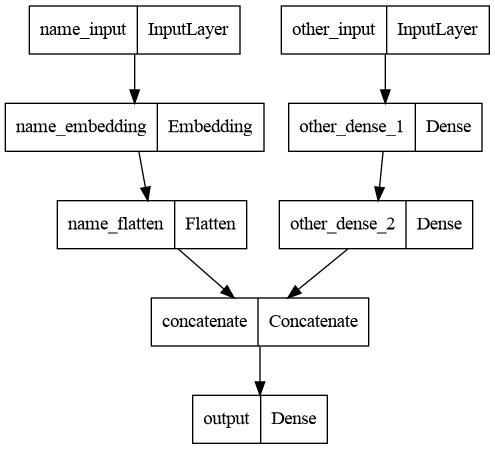

In [38]:
# Other features
other_input = tf.keras.Input(shape=(252, ), name='other_input')

hidden_1 = tf.keras.layers.Dense(256, activation='relu', name='other_dense_1')(other_input)
hidden_2 = tf.keras.layers.Dense(256, activation='relu', name='other_dense_2')(hidden_1)

# Concatenate and output
concat = tf.keras.layers.concatenate([name_flatten, hidden_2], name='concatenate')

outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(concat)

model = tf.keras.Model(inputs=[name_input, other_input], outputs=outputs)

print(model.summary())

tf.keras.utils.plot_model(model)

In [39]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

batch_size = 32
epochs = 100

history = model.fit(
    [names_train, X_train],
    y_train,
    validation_split = 0.12,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 3,
            restore_best_weights = True
        )
    ]
)

Epoch 1/100
11/11 [==============================] - 2s 49ms/step - loss: 0.6551 - accuracy: 0.6331 - auc: 0.6966 - val_loss: 0.6037 - val_accuracy: 0.8085 - val_auc: 0.7697
Epoch 2/100
11/11 [==============================] - 0s 18ms/step - loss: 0.4332 - accuracy: 0.9615 - auc: 0.9950 - val_loss: 0.5170 - val_accuracy: 0.7872 - val_auc: 0.8233
Epoch 3/100
11/11 [==============================] - 0s 17ms/step - loss: 0.2438 - accuracy: 0.9941 - auc: 1.0000 - val_loss: 0.4227 - val_accuracy: 0.7872 - val_auc: 0.8571
Epoch 4/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0931 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 0.3819 - val_accuracy: 0.7872 - val_auc: 0.8835
Epoch 5/100
11/11 [==============================] - 0s 19ms/step - loss: 0.0274 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 0.3837 - val_accuracy: 0.7872 - val_auc: 0.8835
Epoch 6/100
11/11 [==============================] - 0s 21ms/step - loss: 0.0093 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 0.39

### Results

In [41]:
results = model.evaluate([names_test, X_test], y_test)
results

6/6 [==============================] - 0s 4ms/step - loss: 0.3128 - accuracy: 0.8667 - auc: 0.9249


[0.31277430057525635, 0.8666666746139526, 0.924878716468811]

In [43]:
print("Model Accuracy: {:.3f}, Model AUC: {:.4f}".format(results[1], results[2]))

Model Accuracy: 0.867, Model AUC: 0.9249
